In [113]:
import deepchem as dc
import pandas as pd
import numpy as np
import csv

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,RationalQuadratic, Matern

In [114]:
#load the dataset (polymer smiles and their specific gravity)

descriptors = ["AvgIpc",
"Chi1",
"Ipc",
"MinAbsEStateIndex",
"SlogP_VSA5",
 ]
#tasks = ["PC", "RKTZRA", "SG", "TB", "TC", "ZC"]
print("loading the data...")
loader = dc.data.CSVLoader(["PC"], feature_field="smiles", featurizer=dc.feat.RDKitDescriptors(descriptors = descriptors))
Data = loader.create_dataset('../csv_files/Combined_PC.csv')

loading the data...


we see that some specific gravity values are unknonw, the values of these sample are equal to zero!

In [115]:
#some RDKit descriptors return nan, make these 0
X = np.nan_to_num(Data.X, copy=True, nan=0.0, posinf=0)
#add data to dataset
Dataset = dc.data.DiskDataset.from_numpy(X=X, y=Data.y, w=Data.w, ids=Data.ids, tasks = ["SG"])

In [116]:
#split the dataset using the random splitter
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(Dataset)
print("Data is splitted into: train, valid, test")


Data is splitted into: train, valid, test


In [121]:
# create the GPR model & fit the model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, ConstantKernel, Matern, RationalQuadratic, ExpSineSquared, DotProduct, WhiteKernel

kernel = 1 * RBF() + WhiteKernel()
model = dc.models.SklearnModel(GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10))

print("fitting model...")
model.fit(train_dataset)
print("model is fitted")

#predict the test set
predicted = model.predict(test_dataset)

fitting model...
model is fitted


c:\Users\wanne\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:434: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [112]:

#calculate r2 scores
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
train_r2score = model.evaluate(train_dataset, metric)
valid_r2score = model.evaluate(valid_dataset, metric)
test_r2score= model.evaluate(test_dataset, metric)

#make then useable
testr2=list(test_r2score.values())[0]
validr2=list(valid_r2score.values())[0]
trainr2=list(train_r2score.values())[0]

print("training r2-score:",np.mean(trainr2) )
print("valid r2-score:",np.mean(validr2) )
print("test r2-score:",np.mean(testr2) )

training r2-score: 0.9723744356164995
valid r2-score: 0.9547038447684603
test r2-score: 0.9805769738408279


In [106]:
#calculate RMSE score
from sklearn.metrics import root_mean_squared_error
RMSE_score = root_mean_squared_error(test_dataset.y,predicted)
print('tets set score:',RMSE_score)

tets set score: 1.5008095779481143


In [107]:
#convert tekst to string, so it can be depicted in matplotlib

text = "test r2= "+ str(round(testr2,4))  + " & RMSE= " +str(round(RMSE_score,4))

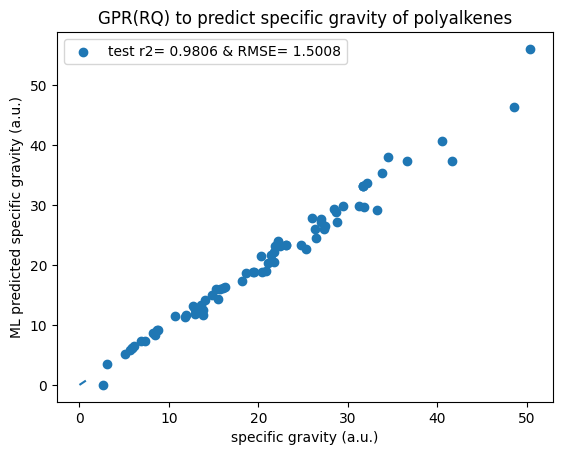

In [108]:
#plot the data
import matplotlib.pyplot as plt

x=[0,1]
y=[0,1]
#text = "R2= "+ str(round(test_score))
plt.plot(x, y, linestyle="dashed")
plt.scatter(test_dataset.y, predicted, label=text)
plt.legend()
plt.xlabel("specific gravity (a.u.)")
plt.ylabel("ML predicted specific gravity (a.u.)")
plt.title("GPR(RQ) to predict specific gravity of polyalkenes")
plt.show()


In [109]:



'''result_r2 = []
result_rmse = []

for i in range(20):
    print("round:", i, '\n')
    #split the dataset using the random splitter
    splitter = dc.splits.RandomSplitter()
    train_dataset, test_dataset = splitter.train_test_split(Dataset)
    print("Data is splitted into: train, valid, test")

    # create the GPR model & fit the model
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import RBF, DotProduct, ConstantKernel, Matern, RationalQuadratic, ExpSineSquared, DotProduct

    kernel = 1 * RationalQuadratic()
    model = dc.models.SklearnModel(GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10))

    print("fitting model...")
    model.fit(train_dataset)
    print("model is fitted")

    #predict the test set
    predicted = model.predict(test_dataset)

    #calculate r2 score
    metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
    print('Training set score:', model.evaluate(train_dataset, metric))
    test_score= model.evaluate(test_dataset, metric)
    print('Test set score:',test_score )
    r2=list(test_score.values())[0]
    result_r2.append(r2)

    #calculate RMSE score
    from sklearn.metrics import root_mean_squared_error
    RMSE_score = root_mean_squared_error(test_dataset.y,predicted)
    print('tets set score:',RMSE_score)
    result_rmse.append(RMSE_score)

print("average r2-score:",np.mean(result_r2) )
print("average RMSE-score:",np.mean(result_rmse) )'''


'result_r2 = []\nresult_rmse = []\n\nfor i in range(20):\n    print("round:", i, \'\n\')\n    #split the dataset using the random splitter\n    splitter = dc.splits.RandomSplitter()\n    train_dataset, test_dataset = splitter.train_test_split(Dataset)\n    print("Data is splitted into: train, valid, test")\n\n    # create the GPR model & fit the model\n    from sklearn.gaussian_process import GaussianProcessRegressor\n    from sklearn.gaussian_process.kernels import RBF, DotProduct, ConstantKernel, Matern, RationalQuadratic, ExpSineSquared, DotProduct\n\n    kernel = 1 * RationalQuadratic()\n    model = dc.models.SklearnModel(GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10))\n\n    print("fitting model...")\n    model.fit(train_dataset)\n    print("model is fitted")\n\n    #predict the test set\n    predicted = model.predict(test_dataset)\n\n    #calculate r2 score\n    metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)\n    print(\'Training set score:\', model.eva